In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
n_task_per_file = 10
n_files = 20
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [23]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [24]:
coverage_df

,0.5,1,2,4,Tree val,Naive
0,1.00,0.500000,0.750000,1.000000,1.0,0.750000
1,0.75,0.750000,1.000000,0.666667,1.0,1.000000
2,1.00,1.000000,1.000000,1.000000,1.0,1.000000
3,1.00,0.666667,1.000000,0.750000,1.0,0.333333
4,1.00,1.000000,0.500000,1.000000,1.0,0.750000
...,...,...,...,...,...,...
5,1.00,1.000000,1.000000,1.000000,1.0,0.750000
6,1.00,1.000000,0.750000,1.000000,1.0,1.000000
7,1.00,0.500000,0.750000,0.750000,1.0,1.000000
8,1.00,0.500000,1.000000,1.000000,1.0,1.000000


In [25]:
length_df

,0.5,1,2,4,Tree val,Naive
0,7.189050,7.252187,2.601531,2.531989,9.446893,2.374976
1,5.465373,4.406454,1.801008,1.790222,51.041103,2.380524
2,8.070771,7.649790,3.070360,2.921352,14.113655,2.311606
3,8.443825,5.715949,4.161080,1.633618,4.702656,2.763298
4,8.265723,7.420074,5.114656,2.572160,5.072773,2.446418
...,...,...,...,...,...,...
5,12.272015,9.169600,4.327690,3.236895,3.034606,2.081998
6,14.895716,10.130096,2.035483,2.916906,3.591616,2.479805
7,6.934732,46.252724,41.886160,1.939946,16.744906,2.350677
8,12.900125,5.063653,4.470201,2.212647,8.285259,2.237698


In [26]:
MSE_df

,0.5,1,2,4,Tree val,Naive
0,4.165064,4.165064,4.061124,3.469537,3.732954,3.732954
1,5.535602,5.146498,4.979869,4.879052,4.999033,4.999033
2,5.199135,5.181709,5.520765,5.056813,4.725472,4.725472
3,6.766394,6.691980,6.662779,6.560105,6.766394,6.766394
4,5.395052,5.395052,5.114757,5.287869,5.641457,5.641457
...,...,...,...,...,...,...
5,3.187696,3.187696,3.154328,3.209549,3.160326,3.160326
6,4.692098,4.752022,4.349299,4.439042,4.912197,4.912197
7,4.509973,4.919542,4.760805,4.858244,4.509973,4.509973
8,4.408710,4.483805,4.135016,4.134494,4.590021,4.590021


In [29]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.5         0.947500
1           0.905000
2           0.889167
4           0.813333
Tree val    0.879167
Naive       0.748750
dtype: float64
Length :
 0.5         11.643876
1            7.824386
2            4.810438
4            3.225994
Tree val    19.844399
Naive        2.246984
dtype: float64
MSE :
 0.5         4.754312
1           4.734872
2           4.703670
4           4.627758
Tree val    4.698949
Naive       4.698949
dtype: float64


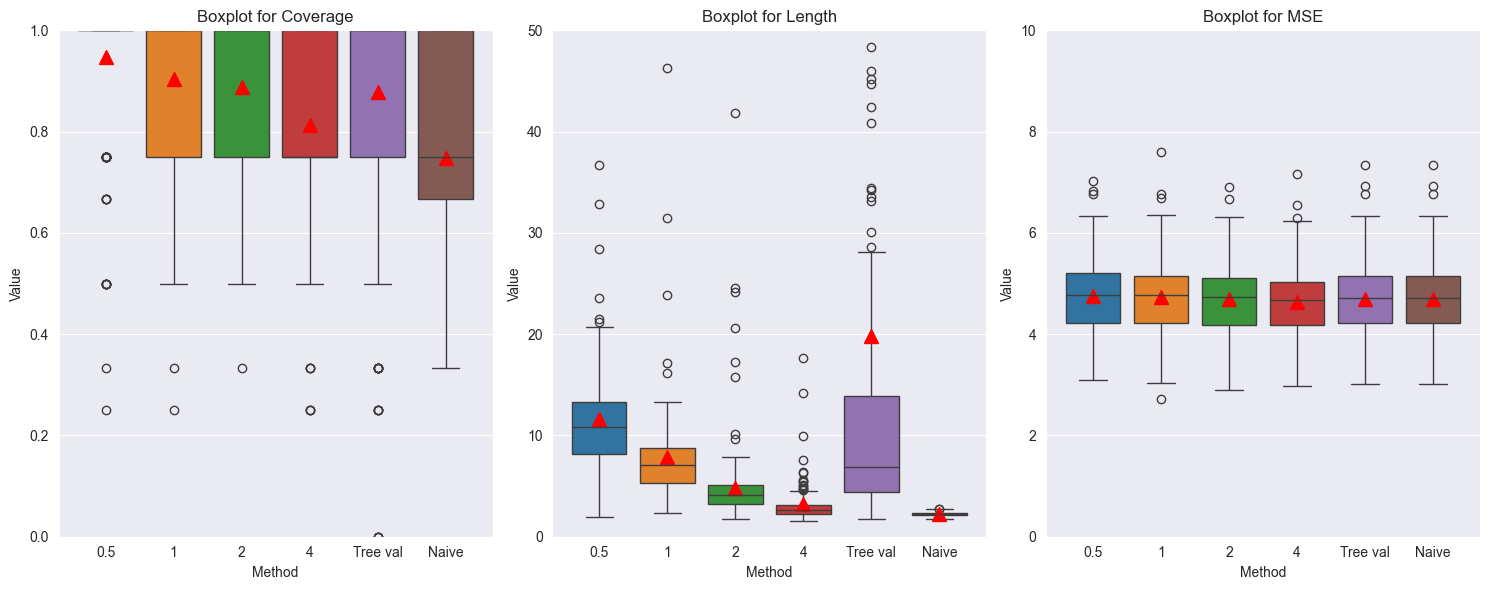

In [30]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])